## Train set, Validation set, Test set

- Để đánh giá xem model có học không hay chỉ nhớ cũng như khi dùng ngoài thực tế thì performance sẽ thế nào, người ta chia dataset làm 3 tập traning set, validation set và test set. 
- Mình sẽ cho model học trên tập training set và đánh giá model trên tập validation set. 
- Nếu có nhiều hơn 1 mô hình (ví dụ VGG16, VGG19,...) thì mô hình nào cho performance tốt hơn trên
tập validation set sẽ được chọn. Và cuối cùng model tốt nhất sẽ được đánh giá trên tập test set làm
hiệu suất của model khi dùng thực tế. 
- Nhận thấy là tập test set không được dùng trong cả quá trình
training chỉ đến cuối dùng để đánh giá.



## Softmax function

- Nhắc lại bài neural network, ở mỗi layer sẽ thực hiện 2 bước: tính tổng linear các node ở layer trước
và thực hiện activation function (ví dụ sigmoid function, softmax function). Do sau bước tính tổng
linear cho ra các giá trị thực nên cần dùng softmax function dùng để chuyển đổi giá trị thực trong
các node ở output layer sang giá trị phần trăm.
- Vì mỗi ảnh sẽ thuộc 1 class từ 0 đến 9, nên tất cả sẽ có 10 class. Nên output layer sẽ có 10
node để tương ứng với phần trăm ảnh là số 0,1,..,9. Ví dụ: a6 là xác suất ảnh là số 5.
> Với các bài toán classification (phân loại) thì nếu có 2 lớp thì hàm activation ở output layer
là hàm sigmoid và hàm loss function là binary_crossentropy, còn nhiều hơn 2 lớp thì hàm
activation ở ouput layer là hàm softmax với loss function là hàm categorical_crossentropy


## Loss function

$$H(p,q) = -\sum_{x}p(x)logq(x)$$

> p is the true probability distribution and q is the predicted probability distribution

$$L =-\sum_{i=1}^{10}y_i*log(\hat{y}_i)$$


=> Hàm L nhỏ khi giá trị model dự đoán gần với giá trị thật và rất lớn khi model dự đoán sai, hay
nói cách khác L càng nhỏ thì model dự đoán càng gần với giá trị thật. => Bài toán tìm model trở
thành tìm giá trị nhỏ nhất của L.
>Hàm loss function định nghĩa như trên trong keras gọi là "categorical_crossentropy"

## Code

### 1. Thêm các thư viện cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

### 2. Load dữ liệu MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)


(50000, 28, 28)


### 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### 4. One hot encoding label (Y)

In [4]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 5. Định nghĩa model

In [5]:
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))


### 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức đùng để tối ưu hàm loss function.


In [6]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

### 7. Thực hiện train model với data

In [7]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
            batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 92s 47ms/step - loss: 0.6330 - accuracy: 0.8105 - val_loss: 0.0625 - val_accuracy: 0.9841
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.0588 - accuracy: 0.9828 - val_loss: 0.0510 - val_accuracy: 0.9861
Epoch 3/10
1563/1563 [==============================] - 90s 57ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0478 - val_accuracy: 0.9867
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.0253 - accuracy: 0.9927 - val_loss: 0.0447 - val_accuracy: 0.9879
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.0160 - accuracy: 0.9957 - val_loss: 0.0443 - val_accuracy: 0.9866
Epoch 6/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.0399 - val_accuracy: 0.9882
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.0446 -

### 8. Vẽ đồ thị loss, accuracy của training set và validation set

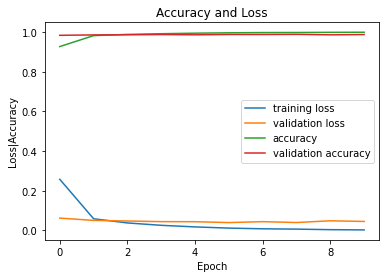

In [8]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

### 9. Đánh giá model với dữ liệu test set

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03155196085572243, 0.9894000291824341]


### 10. Dự đoán ảnh


Giá trị dự đoán:  9


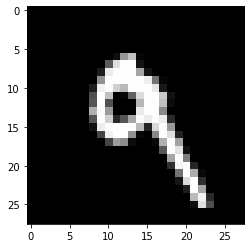

In [19]:
plt.imshow(X_test[7].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[7].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))
